In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
## Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

(50000, 28, 28)


In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [4]:
X_train[0].shape

(28, 28, 1)

In [5]:
y_train.shape

(50000,)

In [6]:
## One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 58s 1ms/step - loss: 0.3108 - accuracy: 0.9148 - val_loss: 0.0847 - val_accuracy: 0.9762
Epoch 2/10
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0570 - accuracy: 0.9845 - val_loss: 0.0565 - val_accuracy: 0.9837
Epoch 3/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.0357 - accuracy: 0.9897 - val_loss: 0.0440 - val_accuracy: 0.9884
Epoch 4/10
50000/50000 [==============================] - 48s 963us/step - loss: 0.0240 - accuracy: 0.9932 - val_loss: 0.0465 - val_accuracy: 0.9862
Epoch 5/10
50000/50000 [==============================] - 47s 950us/step - loss: 0.0183 - accuracy: 0.9947 - val_loss: 0.0429 - val_accuracy: 0.9877
Epoch 6/10
50000/50000 [==============================] - 56s 1ms/step - loss: 0.0115 - accuracy: 0.9970 - val_loss: 0.0454 - val_accuracy: 0.9884
Epoch 7/10
50000/50000 [==============================] - 59s 1m

In [10]:
## đánh giá model vs test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03285277025277755, 0.9909999966621399]


Giá trị dự đoán:  5


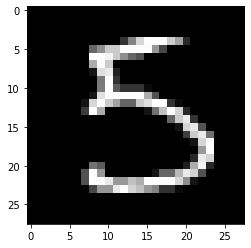

In [11]:
## dự đoán ảnh

plt.imshow(X_test[15].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[15].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))